<h1>Taller ODE Con Métodos Numéricos</h1>
<h2>Juan Pablo Peñaloza, Nicolás Miranda, William Moreno y Johan Murillo</h2>

<h3>1.</h3>

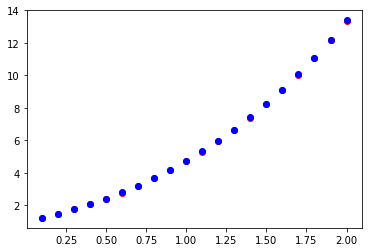

In [1]:
from pylab import *
from mpmath import odefun, cos, sin, mpf, sinc, mp


def f(x,y):
    return y + x - x**2 +1


def realSol(x):
    g = odefun(lambda x, y: y + x - x**2 +1, 0, 1)
    return g(x)
    
def euler(f, x, y, h, m):
    u = []
    v = []
    for i in range(m):
        k1 = h * f(x,y)
        k2 = h * f(x+ h, y + k1)
        y = y + (0.5)*(k1 + k2)
        x = x + h
        u = u + [x]
        v = v + [y]
    return [u,v]

[u,v] = euler(f,0,1,0.1,20)
realV = [];
for i in u:
    realV.append(realSol(i))

plot(u,v,'or')
plot(u,realV,'ob')
show()

<h3>2.</h3>

/Users/JuanPablo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars


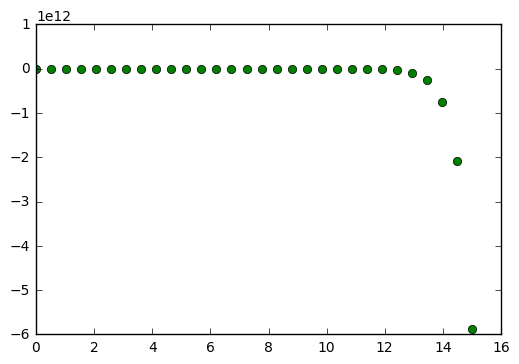

In [7]:
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import *
from mpmath import odefun, cos, sin, mpf, sinc, mp

def f(x,y):
    return 2*y - 2*x**2 + x - 3

def realSol(x):
    g = odefun(lambda x, y: 2*y - 2*x**2 + x - 3, 0.0, 1.2)
    return g(x)

def getRealSolutionArray(t):
    x = []
    for i in t:
        x.append(realSol(i))
    return x

def heun( f, x0, t ):
    """Heun's method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = heun(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """
    n = len( t )
    x = numpy.array( [x0] * n )
    for i in xrange( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + ( k1 + k2 ) / 2.0

    return x

def euler( f, x0, t ):
    """Euler's method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = euler(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = numpy.array( [x0] * n )
    for i in xrange( n - 1 ):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )

    return x

def rk4( f, x0, t ):
    """Fourth-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rk4(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = numpy.array( [ x0 ] * n )
    for i in xrange( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

a, b = ( 0.0, 15.0 )
x0 = 1.2
n = 30
t = numpy.linspace( a, b, n )
h = 0.1;
x_euler = euler( f, x0, t )
x_heun = heun( f, x0, t )
x_rk4 = rk4( f, x0, t )
real = getRealSolutionArray(t)

#plot(t,x_euler,'or',label='Euler')
#plot(t,x_heun,'ob', label='Heun')
#plot(t,x_rk4,'oy', label='Runge-Kutta')
plot(t,real,'og', label='Real')
show()